In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Cargar el dataset y hacer un resumen
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
# Verificar el contendio del dataset
print("DESCRIBE:\n", df.describe())
print("SHAPE:\n", df.shape)
print("INFO:\n", df.info())
print("DTYPES:\n", df.dtypes)
print("CANTIDAD NULOS:", df.isnull().sum())
print("CANTIDAD DUPLICADOS:", df.duplicated().sum())


DESCRIBE:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   35.686355    0.524184   
std     256.998173    0.486260    0.834700   17.756733    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   32.000000    0.000000   
75%     668.000000    1.000000    3.000000   54.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  
mean     0.382452   32.096681    2.535433  
std      0.806761   49.697504    0.792088  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.895800    2.000000  
50%      0.000000   14.454200    3.000000  
75%      0.000000   31.000000    3.000000  
max   

# Visualiaciones

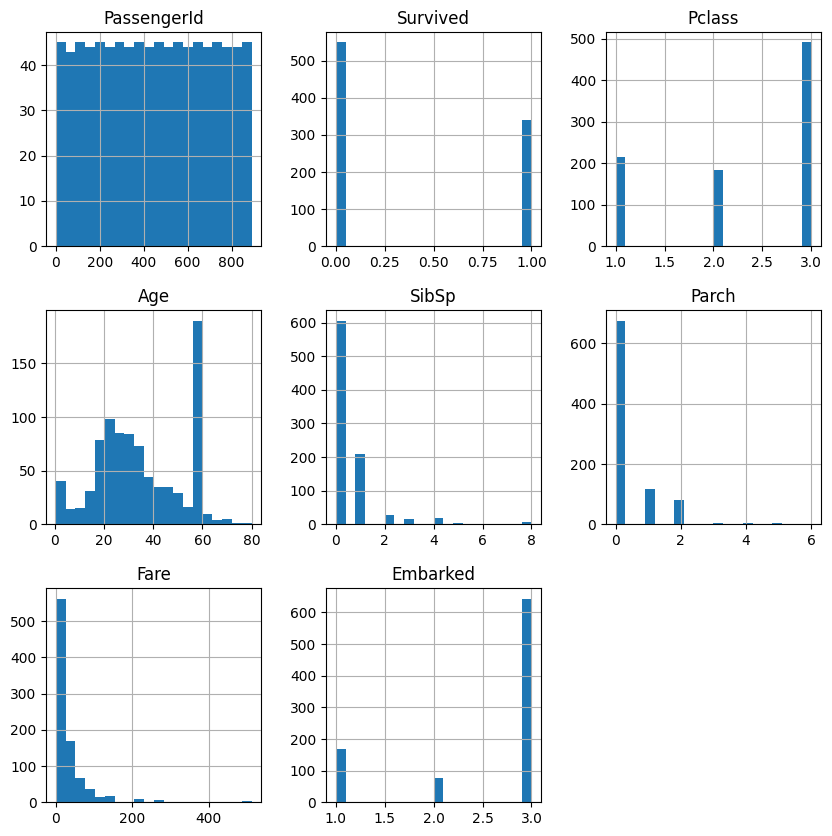

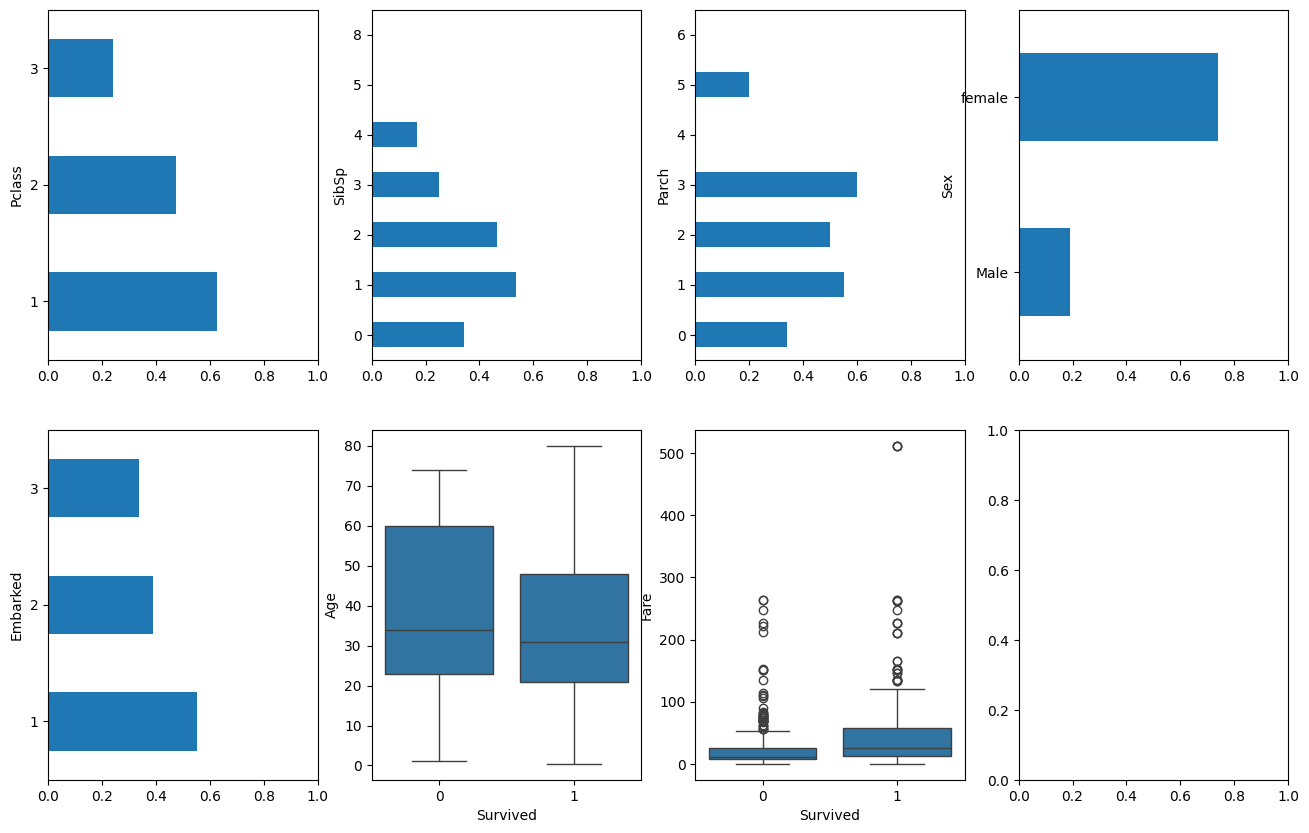

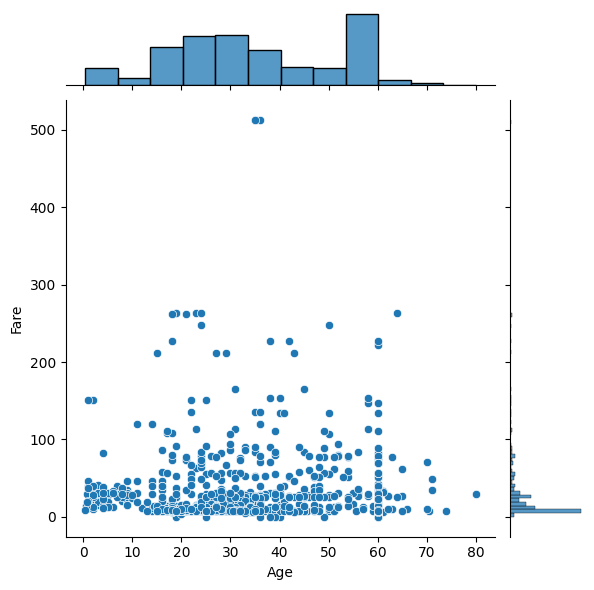

In [ ]:
# df = df.drop(columns=['PassengerId'])

# Creamos un histograma la para distribucion de los datos
df.hist(bins=20, figsize=(10, 10))
plt.show()


figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
df.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
df.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
df.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
df.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
df.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df,ax=axesbi[1,2])

sns.jointplot(x="Age", y="Fare", data=df)

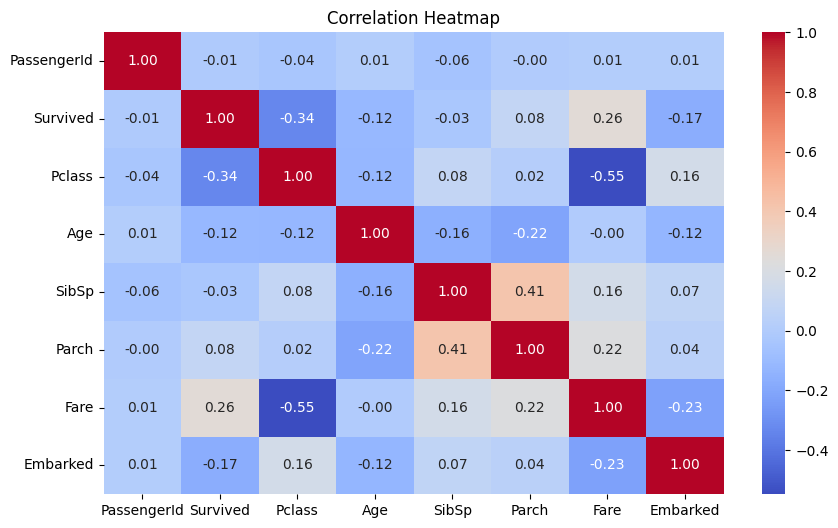

In [34]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Preprocesamiento

In [27]:
# Trabajar con encoders
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

# Seleccionar columnas con quien trabajar
x = df.drop(['Embarked','PassengerId'],axis=1)
y = df.Embarked

# Separar los datos
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
y_train = y_train - np.min(y_train)
y_test = y_test - np.min(y_test)


In [29]:
# Entrenamiento de modelos
models = [RandomForestClassifier(n_estimators=100, random_state=42),
xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
AdaBoostClassifier(random_state=42)]

columns = ['RandomForestClassifier','XGBClassifier', 'AdaBoostClassifier']
result1, result2, result3 = [], [], []

for i in range(len(models)):
    # Entrenamiento
    models[i].fit(x_train, y_train)
    
    # Predicciones
    pre = models[i].predict(x_test)
    
    # Cálculo de métricas
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre, average='weighted')  # Cambia el promedio si lo necesitas
    f1 = f1_score(y_test, pre, average='weighted')
    
    # Almacenar resultados
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    print(models[i])
    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    
# Crear DataFrame con resultados
ResultadoFinal = pd.DataFrame({
    'Algorithm': columns,
    'Accuracies': result1,
    'Recall': result2,
    'FScore': result3
})

print(ResultadoFinal)

RandomForestClassifier(random_state=42)
Accuracy: 0.8231, Recall: 0.8231, F1 Score: 0.8058
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 0.8605, Recall: 0.8605, F1 Score: 0.8538


c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:25:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)
Accuracy: 0.7823, Recall: 0.7823, F1 Score: 0.7402
                Algorithm  Accuracies    Recall    FScore
0  RandomForestClassifier    0.823129  0.823129  0.805835
1           XGBClassifier    0.860544  0.860544  0.853752
2      AdaBoostClassifier    0.782313  0.782313  0.740241
